In [2]:
!pip install prettify

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for prettify: filename=prettify-0.1.1-py3-none-any.whl size=8401 sha256=1c3096af5e54780bcb23ee5059f75505ce660bbc91911e900110d3aa928edbea
  Stored in directory: c:\users\joey\appdata\local\pip\cache\wheels\c8\64\60\040f20e35bb7a8991e1cbee49935bb4b013386738a34266e65
Successfully built prettify


In [3]:
import requests
from bs4 import BeautifulSoup
import prettify
import time
from selenium import webdriver

#pip install selenium
#download chromedriver

In [4]:
def find_link_from_google(query, params=''):
    url = f'https://www.google.com/search?q={query} {params}'
    
    #add header to prevent google from thinking it is a bot
    headers = {
        "User-Agent": 
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.87 Safari/537.36",
    }

    soup_source = requests.get(url, headers=headers).text
    soup = BeautifulSoup(soup_source, 'html.parser')
    
    print(soup.prettify())
    
#     links = soup.find_all('div', class_="yuRUbf")
#     websites = []
    
#     for link in links:
# #         title = link.find('h3', class_='LC20lb MBeuO DKV0Md').text
# #         print(title)
#         website = link.a['href']
#         websites.append(website)
        
#     return websites

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en-SG">
 <head>
  <meta charset="utf-8"/>
  <meta content="origin" name="referrer"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   itinerary switzerland 8 days - Google Search
  </title>
  <script nonce="91q7mr8BozeoCo4nokVWIw">
   (function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:'l5VsY_PQKerKseMPrbqsyA0',kEXPI:'31',kBL:'lB6X'};google.sn='web';google.kHL='en-SG';})();(function(){
var f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}
function n(a,b,c,d,g){var e="";c||-1!==b.search("&ei=")||(e="&ei="+l(d),-1===b.search("&lei=")&&(d=m(d))&&(e+="&lei="+d));d="";!
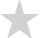
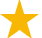
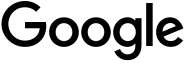

In [5]:
find_link_from_google('itinerary switzerland', '8 days')

In [7]:
def selenium_parse(url):
    driver = webdriver.Chrome('C:/usr/local/bin/chromedriver')
    driver.get(search_url)
    time.sleep(5)
    soup = BeautifulSoup(driver.page_source, 'html5lib')
    driver.quit()
    
    return soup

In [8]:
base_url = 'https://www.tripadvisor.com'

In [9]:
search_url = 'https://www.tripadvisor.com/Search?q=italy'

In [10]:
soup = selenium_parse(search_url)

C:\Users\Joey\AppData\Local\Temp\ipykernel_10320\121864513.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/usr/local/bin/chromedriver')


In [11]:
print(soup.find_all('div', {"class": "result-title"})[0].prettify())
# print(soup.prettify())

<div class="result-title">
 <span>
  Italy
 </span>
</div>



In [12]:
def parse_html(url, print_soup = False):
    headers = {
        "User-Agent": 
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.87 Safari/537.36",
    }

    soup_source = requests.get(url, headers=headers).text
    time.sleep(5)
    soup = BeautifulSoup(soup_source,'html.parser')
    
    if print_soup:
        print(soup.prettify())
    
    return soup

### Get category links

In [13]:
#get links for different categories pages
def get_links(url):
    soup = parse_html(url)
    results = soup.find_all('a', class_='XUWut Ra _S z _Z w o v _Y Wh k _T wSSLS')

    links = {}
    for res in results:
        category = res.find('span', class_='biGQs _P ttuOS').text
        link = base_url + res['href']

        links[category] = link
        print(f'{category}: {link}\n')
    
    return links


In [14]:
url = "https://www.tripadvisor.com/Tourism-g188045-Switzerland-Vacations.html"
get_links(url)

Hotels: https://www.tripadvisor.com/Hotels-g188045-Switzerland-Hotels.html

Vacation Rentals: https://www.tripadvisor.com/VacationRentals-g188045-Reviews-Switzerland-Vacation_Rentals.html

Things to Do: https://www.tripadvisor.com/Attractions-g188045-Activities-Switzerland.html

Restaurants: https://www.tripadvisor.com/Restaurants-g188045-Switzerland.html

Travel Forums: https://www.tripadvisor.com/ShowForum-g188045-i336-Switzerland.html

Hire a Trip Designer: https://www.tripadvisor.comhttps://www.helloreco.com/?utm_source=tripadvisor&utm_medium=tourism&utm_campaign=ql&variant=hire_a_td&location_id=188045

Flights: https://www.tripadvisor.com/Flights-g188045-Switzerland-Cheap_Discount_Airfares.html

Cruises: https://www.tripadvisor.com/CruiseDestination-g4-Europe

Rental Cars: https://www.tripadvisor.com/RentalCars-g188045-Switzerland.html

Vacation Packages: https://www.tripadvisor.com/Vacation_Packages-g188045-Switzerland-Vacations.html

Add a Place: https://www.tripadvisor.com/AddL

{'Hotels': 'https://www.tripadvisor.com/Hotels-g188045-Switzerland-Hotels.html',
 'Vacation Rentals': 'https://www.tripadvisor.com/VacationRentals-g188045-Reviews-Switzerland-Vacation_Rentals.html',
 'Things to Do': 'https://www.tripadvisor.com/Attractions-g188045-Activities-Switzerland.html',
 'Restaurants': 'https://www.tripadvisor.com/Restaurants-g188045-Switzerland.html',
 'Travel Forums': 'https://www.tripadvisor.com/ShowForum-g188045-i336-Switzerland.html',
 'Hire a Trip Designer': 'https://www.tripadvisor.comhttps://www.helloreco.com/?utm_source=tripadvisor&utm_medium=tourism&utm_campaign=ql&variant=hire_a_td&location_id=188045',
 'Flights': 'https://www.tripadvisor.com/Flights-g188045-Switzerland-Cheap_Discount_Airfares.html',
 'Cruises': 'https://www.tripadvisor.com/CruiseDestination-g4-Europe',
 'Rental Cars': 'https://www.tripadvisor.com/RentalCars-g188045-Switzerland.html',
 'Vacation Packages': 'https://www.tripadvisor.com/Vacation_Packages-g188045-Switzerland-Vacations.ht

In [15]:
url = "https://www.tripadvisor.com/Tourism-g187768-Italy-Vacations.html"
get_links(url)

Hotels: https://www.tripadvisor.com/Hotels-g187768-Italy-Hotels.html

Vacation Rentals: https://www.tripadvisor.com/VacationRentals-g187768-Reviews-Italy-Vacation_Rentals.html

Things to Do: https://www.tripadvisor.com/Attractions-g187768-Activities-Italy.html

Restaurants: https://www.tripadvisor.com/Restaurants-g187768-Italy.html

Travel Forums: https://www.tripadvisor.com/ShowForum-g187768-i20-Italy.html

Hire a Trip Designer: https://www.tripadvisor.comhttps://www.helloreco.com/?utm_source=tripadvisor&utm_medium=tourism&utm_campaign=ql&variant=hire_a_td&location_id=187768

Flights: https://www.tripadvisor.com/Flights-g187768-Italy-Cheap_Discount_Airfares.html

Cruises: https://www.tripadvisor.com/CruiseDestination-g14114078-Mediterranean

Rental Cars: https://www.tripadvisor.com/RentalCars-g187768-Italy.html

Vacation Packages: https://www.tripadvisor.com/Vacation_Packages-g187768-Italy-Vacations.html

Add a Place: https://www.tripadvisor.com/AddListing



{'Hotels': 'https://www.tripadvisor.com/Hotels-g187768-Italy-Hotels.html',
 'Vacation Rentals': 'https://www.tripadvisor.com/VacationRentals-g187768-Reviews-Italy-Vacation_Rentals.html',
 'Things to Do': 'https://www.tripadvisor.com/Attractions-g187768-Activities-Italy.html',
 'Restaurants': 'https://www.tripadvisor.com/Restaurants-g187768-Italy.html',
 'Travel Forums': 'https://www.tripadvisor.com/ShowForum-g187768-i20-Italy.html',
 'Hire a Trip Designer': 'https://www.tripadvisor.comhttps://www.helloreco.com/?utm_source=tripadvisor&utm_medium=tourism&utm_campaign=ql&variant=hire_a_td&location_id=187768',
 'Flights': 'https://www.tripadvisor.com/Flights-g187768-Italy-Cheap_Discount_Airfares.html',
 'Cruises': 'https://www.tripadvisor.com/CruiseDestination-g14114078-Mediterranean',
 'Rental Cars': 'https://www.tripadvisor.com/RentalCars-g187768-Italy.html',
 'Vacation Packages': 'https://www.tripadvisor.com/Vacation_Packages-g187768-Italy-Vacations.html',
 'Add a Place': 'https://www.t

### Hotels

In [16]:
def get_hotels(url):
    soup = parse_html(url)
    results = soup.findAll('div', {'class':'ui_column is-8 main_col allowEllipsis'})
    hotels = []
    count = 1
    
    for res in results:
        hotel = {}
        listing = res.find('div', {'class':'listing_title'})
        hotel_name = listing.text.strip() #need to remove numbers - maybe using regex?
        hotel_link = base_url + listing.find('a')['href']
        rating = res.find('a', {'class':'ui_bubble_rating'})['alt']
        
        if count < 10:
            hotel_name_stripped = hotel_name[3:]
        elif count >= 10 and count < 100:
            hotel_name_stripped = hotel_name[4:]
        else:
            hotel_name_stripped = hotel_name[5:]
        
        hotel['id'] = count
        hotel['name'] = hotel_name_stripped
        hotel['url'] = hotel_link
        hotel['rating'] = float(rating[:-13])
        
        hotels.append(hotel)
        count += 1
        
    return hotels


In [17]:
url = 'https://www.tripadvisor.com/Hotels-g187768-Italy-Hotels.html'
hotel_list = get_hotels(url)
hotel_list

[{'id': 1,
  'name': 'Hotel Moresco',
  'url': 'https://www.tripadvisor.com/Hotel_Review-g187870-d3348175-Reviews-Hotel_Moresco-Venice_Veneto.html',
  'rating': 5.0},
 {'id': 2,
  'name': 'Hotel Artemide',
  'url': 'https://www.tripadvisor.com/Hotel_Review-g187791-d205044-Reviews-Hotel_Artemide-Rome_Lazio.html',
  'rating': 5.0},
 {'id': 3,
  'name': 'Turin Palace Hotel',
  'url': 'https://www.tripadvisor.com/Hotel_Review-g187855-d8333271-Reviews-Turin_Palace_Hotel-Turin_Province_of_Turin_Piedmont.html',
  'rating': 5.0},
 {'id': 4,
  'name': 'Hotel Spadai',
  'url': 'https://www.tripadvisor.com/Hotel_Review-g187895-d230717-Reviews-Hotel_Spadai-Florence_Tuscany.html',
  'rating': 5.0},
 {'id': 5,
  'name': 'Hotel Antiche Figure',
  'url': 'https://www.tripadvisor.com/Hotel_Review-g187870-d289202-Reviews-Hotel_Antiche_Figure-Venice_Veneto.html',
  'rating': 5.0},
 {'id': 6,
  'name': 'Hotel Milu',
  'url': 'https://www.tripadvisor.com/Hotel_Review-g187895-d10462189-Reviews-Hotel_Milu-Fl

In [18]:
for h in hotel_list:
    print(h['url'])

https://www.tripadvisor.com/Hotel_Review-g187870-d3348175-Reviews-Hotel_Moresco-Venice_Veneto.html
https://www.tripadvisor.com/Hotel_Review-g187791-d205044-Reviews-Hotel_Artemide-Rome_Lazio.html
https://www.tripadvisor.com/Hotel_Review-g187855-d8333271-Reviews-Turin_Palace_Hotel-Turin_Province_of_Turin_Piedmont.html
https://www.tripadvisor.com/Hotel_Review-g187895-d230717-Reviews-Hotel_Spadai-Florence_Tuscany.html
https://www.tripadvisor.com/Hotel_Review-g187870-d289202-Reviews-Hotel_Antiche_Figure-Venice_Veneto.html
https://www.tripadvisor.com/Hotel_Review-g187895-d10462189-Reviews-Hotel_Milu-Florence_Tuscany.html
https://www.tripadvisor.com/Hotel_Review-g187870-d12579192-Reviews-Rosa_Salva_Hotel-Venice_Veneto.html
https://www.tripadvisor.com/Hotel_Review-g187895-d203921-Reviews-Hotel_David-Florence_Tuscany.html
https://www.tripadvisor.com/Hotel_Review-g187791-d19907141-Reviews-Dharma_Boutique_Hotel_Spa-Rome_Lazio.html
https://www.tripadvisor.com/Hotel_Review-g187870-d233931-Reviews-H

### Top Attractions

In [19]:
all_flag = '-a_allAttractions.true'
attractions_italy = 'https://www.tripadvisor.com/Attractions-g187768-Activities-Italy.html'
attractions_swiss = 'https://www.tripadvisor.com/Attractions-g188045-Activities-Switzerland.html'


url_italy = f'{attractions_italy[:58]}{all_flag}{attractions_italy[58:]}'
url_swiss = f'{attractions_swiss[:58]}{all_flag}{attractions_swiss[58:]}'


print(url_swiss)

https://www.tripadvisor.com/Attractions-g188045-Activities-a_allAttractions.true-Switzerland.html


In [180]:
def get_attractions(url):
    soup = parse_html(url, print_soup=True)
    attractions = []
    results = soup.find_all('div',class_="ScCHL")
    
    for i in results:
        attraction={}
        edited_name = i.find('div', class_='XfVdV o AIbhI').text
        name = edited_name.split(' ')[1:]
        name = ' '.join(name)
        attraction['name'] = name
        details = i.find_all('div', class_="biGQs _P pZUbB hmDzD")
        attraction['activity'] = details[0].text
        attraction['location'] = details[1].text
        ratings = i.find('svg',class_='UctUV d H0')['aria-label']
        ratings = ratings.split(' ')[:3] 
        ratings = ' '.join(ratings)
        attraction['ratings']= ratings
        url = i.find('a', class_="BMQDV _F G- wSSLS SwZTJ FGwzt ukgoS")['href']
        photo_url = i.find('img')['src']
        attraction['photo'] = photo_url
        attraction['review_url'] = base_url+url
        attractions.append(attraction)
            
    return(attractions)
#     results = soup.findAll('div', {'class':'ui_column is-8 main_col allowEllipsis'})
    

In [181]:
soup1 = get_attractions('https://www.tripadvisor.com/Attractions-g187768-Activities-oa0-Italy.html')

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="en" http-equiv="content-language"/>
  <link as="font" crossorigin="anonymous" href="https://static.tacdn.com/css2/webfonts/TripSans/TripSans-VF.woff2?v1.002" rel="preload" type="font/woff2"/>
  <link href="https://static.tacdn.com/favicon.ico?v2" id="favicon" rel="icon" type="image/x-icon"/>
  <link color="#000000" href="https://static.tacdn.com/img2/brand_refresh/application_icons/mask-icon.svg" rel="mask-icon" sizes="any"/>
  <meta content="#34e0a1" name="theme-color"/>
  <meta content="telephone=no" name="format-detection"/>
  <meta content="TripAdvisor" property="al:ios:app_name"/>
  <meta content="284876795" property="al:ios:app_store_id"/>
  <meta content="284876795" name="twitter:app:id:ipad" property="twitter:app:id:ipad"/>
  <meta content="284876795" name="twitter:app:id:iphone" property="twitter:app:id:iphone"/>
  <meta content="tripadvisor://www

In [182]:
soup1

[{'name': "St. Peter's Basilica",
  'activity': 'Historic Sites • Points of Interest & Landmarks',
  'location': 'Vatican / Borgo',
  'ratings': '5.0 of 5',
  'photo': 'https://dynamic-media-cdn.tripadvisor.com/media/photo-o/0e/01/ff/1f/photo1jpg.jpg?w=500&h=-1&s=1',
  'review_url': 'https://www.tripadvisor.com/Attraction_Review-g187793-d631111-Reviews-St_Peter_s_Basilica-Vatican_City_Lazio.html#REVIEWS'},
 {'name': 'Duomo di Milano',
  'activity': 'Religious Sites • Churches & Cathedrals',
  'location': 'Centro Storico',
  'ratings': '4.5 of 5',
  'photo': 'https://dynamic-media-cdn.tripadvisor.com/media/photo-o/0f/2b/65/8c/natele-al-duomo.jpg?w=500&h=-1&s=1',
  'review_url': 'https://www.tripadvisor.com/Attraction_Review-g187849-d195239-Reviews-Duomo_di_Milano-Milan_Lombardy.html#REVIEWS'},
 {'name': 'Gallerie Degli Uffizi',
  'activity': 'Art Museums',
  'location': 'Florence Historic Center',
  'ratings': '4.5 of 5',
  'photo': 'https://dynamic-media-cdn.tripadvisor.com/media/photo